# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

In [2]:
human_files[0]

'/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg'

Number of faces detected: 1


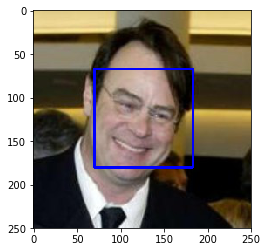

In [25]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [4]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__  
Human faces detected: 98%  
Dog faces detected: 17%

In [5]:
#from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]


## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
h_detected = d_detected = 0
for human in human_files_short:
    h_detected += face_detector(human)
for dog in dog_files_short:
    d_detected += face_detector(dog)

In [6]:
h_detected, d_detected

(98, 17)

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
device=torch.device('cuda' if use_cuda else 'cpu')
# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()
    

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 103836355.97it/s]


In [8]:
device

device(type='cuda')

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [9]:
VGG16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [10]:
from PIL import Image
import torchvision.transforms as transforms
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
        mean=[0.485,0.456,0.406],
        std=[0.229,0.224,0.225])
    ])
    
    #Loading and preparing image
    img=Image.open(img_path)
    img_t=transform(img)
    batch_t=torch.unsqueeze(img_t,0)
    batch_t.to('cuda')
    
    #performing inference
    VGG16.eval()
    inference = VGG16(batch_t.cuda())
    
    _,index=torch.max(inference,1)
    
    return index.cpu().numpy()[0] # predicted class index

In [11]:
prediction = VGG16_predict(dog_files[1000])
print(prediction)

236


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    detected = True if VGG16_predict(img_path) in range(151,269) else False
    return detected # true/false

In [14]:
dog_detector(dog_files[0]),dog_detector(human_files[0])

(True, False)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  
human_files_short: 0%  
dog_files_short: 100%

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
h_detected = d_detected = 0
for human in human_files_short:
    h_detected += dog_detector(human)
for dog in dog_files_short:
    d_detected += dog_detector(dog)
h_detected,d_detected

(0, 100)

We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [106]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size=30
data_dir='/data/dog_images/'
train_dir=os.path.join(data_dir,'train/')
val_dir=os.path.join(data_dir,'valid/')
test_dir=os.path.join(data_dir,'test/')

In [100]:
normalize=transforms.Normalize(mean=[0.485,0.456,0.406],
                               std=[0.229,0.224,0.225])

transform_train= transforms.Compose([transforms.Resize(256),
                                     transforms.RandomCrop(224),
                                     transforms.RandomHorizontalFlip(0.2),
                                     transforms.RandomRotation(20),
                                     transforms.ToTensor(),
                                     normalize])
transform_val=transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                 transforms.ToTensor(),
                                 normalize])
transform_test=transforms.Compose([transforms.Resize(256),
                                  transforms.CenterCrop(224),
                                  transforms.ToTensor(),
                                  normalize])

In [107]:
train_data=datasets.ImageFolder(train_dir, transform=transform_train)                        
val_data=datasets.ImageFolder(val_dir,transform=transform_val)
test_data=datasets.ImageFolder(test_dir,transform=transform_test)

In [108]:
loader_train=DataLoader(train_data,
                       batch_size=batch_size,
                       shuffle=True)
loader_val=DataLoader(val_data,
                      batch_size=batch_size,
                      shuffle=False)
loader_test=DataLoader(test_data,
                       batch_size=batch_size,
                       shuffle=False)

loaders_scratch={'train': loader_train,
                 'valid': loader_val,
                 'test': loader_test}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- All the images are resized to (256,256) and then cropped to (224,224) because this is the default size of input tensors that the initial VGG16 model was originally trained on. The tensors are also normalized with mean and std values prescribed by the PyTorch documentation.
- The train dataset is also augmented through RandomHorizontalFlip with p=0.2 and RandomRotations of 20 degree and RandomCrop to introduce some complexity in the training data to avoid overfitting.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [113]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        #224*224*3 -> 112*112*32
        self.conv1=nn.Conv2d(3,32,kernel_size=3,stride=2,padding=1)
        #(after pooling) 56*56*32 -> 28*28*64
        self.conv2=nn.Conv2d(32,64,3,stride=2,padding=1)
        #(after pooling) 14*14*64 -> 7*7*128 (after pooling)
        self.conv3=nn.Conv2d(64,128,3,padding=1)
        
        #pooling layer
        self.pool=nn.MaxPool2d(2,2)
        
        #Fully connected layers
        self.fc1=nn.Linear(6272,512)      # 7*7*128=6272 input features 
        self.fc2=nn.Linear(512,133)
        
        #Dropout layer
        self.drop=nn.Dropout(p=0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=self.pool(F.relu(self.conv3(x)))
        
        x=x.view(-1,6272)
        
        x=self.drop(x)
        x=F.relu(self.fc1(x))
        x=self.drop(x)
        x=F.relu(self.fc2(x))
    
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

**First Model**  
At first I tried a 3-layer CNN (3->32->64->128) with each conv2d layer of kernel_size=(3,3) and stride = (1,1) and 
2D-maxpooling with stride=2. 2 FC layers at the end, ReLU as activation function, and Adam as Optimizer Function with lr=0.0003.
This model gave me 7% accuracy after 20 epochs.

**Other Models**  
Then I experimented with adding an additional convolution layer to see if that improved accuracy. To my dismay, the model's validation loss kept at ~4.8 after 3 epochs and I gave up on the training.
After that I changed the transformers a little, increased stride values and played around with the optimizer function's learning rate and batch_sizes. However, no model gave me a validation loss < 4. Then after reading about the CNN parameters in more depth and following a suggestion on the Udacity's Knowledge forum post, I reverted to my first 3-layer CNN with some changes. 

**Final Model**  
The final model is a modification of the first model that I tried but with optimizer=SGD,lr=0.01 and stride values = 2 for the first 2 conv layers. The architecture looks something like this:

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  F.relu()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  F.relu()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  F.relu()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  
  (drop): Dropout(p=0.3)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  F.relu()
  
  (drop): Dropout(p=0.3)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  F.relu()
)


**Explanation of the architecture**  
The first and second conv layers have kernel size = 3 and stride = 2, This downsizes the input tensor (224*224*3) by half in each con2d layer. Both followed by a maxpooling with stride = 2, which further downsizes the tensor. The 3rd conv2d layer has stride=1 so this does not reduce the h and w of tensor. Then with the last maxpooling with stride =2, resulting in the total downsize of image by a factor of 32. 
The tensor is then passed to FC layers : (7*7*128->512) and (512->133) with droput = 0.3 to avoid overfitting and relu as activation function. The function of FC (or fully-connected) layers can be thought of as a nonlinear PCA, it rectifies the "good" features and diminishes the others via learning the full set of weights. For further understanding of FC layer function, see [this](https://stats.stackexchange.com/questions/182102/what-do-the-fully-connected-layers-do-in-cnns).



In [357]:
model_scratch

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=133, bias=True)
  (drop): Dropout(p=0.3)
)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [114]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [33]:
#The following code is to overcome a common error "OSError: image file is truncated (150 bytes not processed) error." during training
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [205]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
            #initializing optimizer weights to zero 
            optimizer.zero_grad()    
        
            #calling the model's forward pass
            output=model(data)
            
            #calculating loss
            loss=criterion(output,target)
        
            #backpropagation
            loss.backward()
        
            #optimization step
            optimizer.step()
        
            #updating training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))    

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output=model(data)
            loss=criterion(output,target)
            
            valid_loss+=((1/(batch_idx + 1))*(loss.data - valid_loss))
            
            model.eval()

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
       
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('validation loss decreased from {:.6f} to {:.6f}. Model is being saved.'.format(
                valid_loss_min,
                valid_loss))
            
            valid_loss_min=valid_loss
            torch.save(model.state_dict(),save_path)
        
        # return trained model
    return model


In [116]:
# train the model
model_scratch = train(50, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')


Epoch: 1 	Training Loss: 4.888490 	Validation Loss: 4.882903
validation loss decreased from inf to 4.882903. Model is being saved.
Epoch: 2 	Training Loss: 4.877701 	Validation Loss: 4.871150
validation loss decreased from 4.882903 to 4.871150. Model is being saved.
Epoch: 3 	Training Loss: 4.865104 	Validation Loss: 4.855564
validation loss decreased from 4.871150 to 4.855564. Model is being saved.
Epoch: 4 	Training Loss: 4.844608 	Validation Loss: 4.823771
validation loss decreased from 4.855564 to 4.823771. Model is being saved.
Epoch: 5 	Training Loss: 4.811737 	Validation Loss: 4.784118
validation loss decreased from 4.823771 to 4.784118. Model is being saved.
Epoch: 6 	Training Loss: 4.771735 	Validation Loss: 4.741953
validation loss decreased from 4.784118 to 4.741953. Model is being saved.
Epoch: 7 	Training Loss: 4.732205 	Validation Loss: 4.696675
validation loss decreased from 4.741953 to 4.696675. Model is being saved.
Epoch: 8 	Training Loss: 4.694126 	Validation Loss: 4

In [117]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [118]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.789777


Test Accuracy: 13% (114/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [255]:
## TODO: Specify data loaders
normalize=transforms.Normalize(mean=[0.485,0.456,0.406],
                               std=[0.229,0.224,0.225])


transformTrain= transforms.Compose([transforms.RandomResizedCrop(299), #image size of pretrained inception model
                                     transforms.RandomHorizontalFlip(0.2),
                                     transforms.RandomRotation(20),
                                     transforms.ToTensor(),
                                     normalize])
transformVal=transforms.Compose([transforms.Resize(299),
                                 transforms.CenterCrop(299),
                                 transforms.ToTensor(),
                                 normalize])
transformTest=transforms.Compose([transforms.Resize(299),
                                  transforms.CenterCrop(299),
                                  transforms.ToTensor(),
                                  normalize])

train_data=datasets.ImageFolder(train_dir, transform=transformTrain)                        
val_data=datasets.ImageFolder(val_dir,transform=transformVal)
test_data=datasets.ImageFolder(test_dir,transform=transformTest)

loaderTrain=DataLoader(train_data,
                       batch_size=64,
                       shuffle=True)
loaderVal=DataLoader(val_data,
                      batch_size=64,
                      shuffle=False)
loaderTest=DataLoader(test_data,
                       batch_size=32,
                       shuffle=False)

loaders_transfer={'train': loaderTrain,
                 'valid': loaderVal,
                 'test': loaderTest}
                 


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [257]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer=models.inception_v3(pretrained=True)


In [258]:
#looking at the above architecture, we know that the last fc layer takes in 2048 features and outputs 1000 different features
#corresponding to 1000 different ImangeNet classes that it was trained on.
#We only need it to classify 133 different classes. So we'll redefine the fc layer
for param in model_transfer.parameters():
    param.requires_grad=False

model_transfer.fc=nn.Linear(2048,133,bias=True)


for param in model_transfer.fc.parameters():
    param.requires_grad=True

model_transfer.aux_logits = False
    
if use_cuda:
    model_transfer.cuda()

In [259]:
model_transfer

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
**Initial approach**  
At first I was thinking about applying VGG16 architecture, but after reading through a number of articles on comparison between different architectures, I came across this [page](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d) titled "**Illustrated: 10 CNN Architectures**".
I found this table to be particularly insightful:
<img src="my_images/cnns.png" height="512" width="512">


From the image we can see that the InceptionV3 architecture has a better top-1 and top-5 accuracy on ImageNet dataset as compared to VGG16 while being significantly lighter on memory. Other interesting architectures seem to be ResNet50, and Xception.

**Problems with Inceptionv3**  
My first approach, therefore, was to try out InceptionV3. However, I realized that the implementation of InceptionV3 varied significantly from other CNNs like VGG and ResNet, and fell in a loop of errors. One particular error was "TypeError: log_softmax(): argument 'input' (position 1) must be tensor, not tuple" which took me to cleaners for quite a while.

**ResNet50**  
I then resorted to using a relatively simpler architecture ResNet50 with batch_size=128, test batch_size=32, and optimizer=Adam with lr=0.001, while using presvious data loaders from model_scratch part.
But for some reason, the valid_loss seemed to be stuck at >1 after 5 epochs and didn't seem to improve. I could have optimized this model to get the desired result but I found the solution to Inceptionv3 error in the meanwhile!

**Going back to InceptionV3**  
After reading this [discussion](https://discuss.pytorch.org/t/why-auxiliary-logits-set-to-false-in-train-mode/40705) I found out that the InceptionV3's output by default by default comes as a tuple containing an additional "aux_outputs" from the auxiliary branch (hence the TypeError). Assigning aux_logits=False solves the issue and the final InceptionV3 model works like a charm!
Giving the test accuracy of 85% after 12 epochs.

I think Inceptionv3 is more suitable for this problem and other subsets of ImageNet dataset than other architectures especially VGG as it introduces an auxiliary branch rather than simply a sequential approach which helps optimize the learning process. It is also lighter on memory with fewer parameters and a very high top-1 and top-5 accuracy.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [163]:
model_transfer.fc.parameters()

<generator object Module.parameters at 0x7f414d09ad58>

In [261]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(),lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [265]:
# train the model
model_transfer = train(7, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')


Epoch: 1 	Training Loss: 1.714582 	Validation Loss: 0.869166
validation loss decreased from inf to 0.869166. Model is being saved.
Epoch: 2 	Training Loss: 1.351210 	Validation Loss: 0.638854
validation loss decreased from 0.869166 to 0.638854. Model is being saved.
Epoch: 3 	Training Loss: 1.171454 	Validation Loss: 0.527889
validation loss decreased from 0.638854 to 0.527889. Model is being saved.
Epoch: 4 	Training Loss: 1.113235 	Validation Loss: 0.556140
Epoch: 5 	Training Loss: 1.065745 	Validation Loss: 0.482272
validation loss decreased from 0.527889 to 0.482272. Model is being saved.
Epoch: 6 	Training Loss: 1.010159 	Validation Loss: 0.488391
Epoch: 7 	Training Loss: 0.987900 	Validation Loss: 0.432466
validation loss decreased from 0.482272 to 0.432466. Model is being saved.


In [266]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))


In [268]:
#Training the model to 1st 7 epochs gave us an accuracy of 84%. The model was still learning at the end of training
#so we are further training it for 5 more epochs to see how better it can get with the same hyperparams before overfitting
model_transfer1=train(5, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer1.pt')

Epoch: 1 	Training Loss: 0.981415 	Validation Loss: 0.533402
validation loss decreased from inf to 0.533402. Model is being saved.
Epoch: 2 	Training Loss: 0.932137 	Validation Loss: 0.438949
validation loss decreased from 0.533402 to 0.438949. Model is being saved.
Epoch: 3 	Training Loss: 0.946057 	Validation Loss: 0.390563
validation loss decreased from 0.438949 to 0.390563. Model is being saved.
Epoch: 4 	Training Loss: 0.934858 	Validation Loss: 0.439330
Epoch: 5 	Training Loss: 0.924324 	Validation Loss: 0.406454


In [270]:
#Since the validation loss has improved, we'll update our original model_transfer model
model_transfer.load_state_dict(torch.load('model_transfer1.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [271]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.457515


Test Accuracy: 85% (718/836)


To our dismay, not much of an improvement but still greater than 84%! 

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [274]:
data_transfer['train'].classes

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog',
 '011.Australian_cattle_dog',
 '012.Australian_shepherd',
 '013.Australian_terrier',
 '014.Basenji',
 '015.Basset_hound',
 '016.Beagle',
 '017.Bearded_collie',
 '018.Beauceron',
 '019.Bedlington_terrier',
 '020.Belgian_malinois',
 '021.Belgian_sheepdog',
 '022.Belgian_tervuren',
 '023.Bernese_mountain_dog',
 '024.Bichon_frise',
 '025.Black_and_tan_coonhound',
 '026.Black_russian_terrier',
 '027.Bloodhound',
 '028.Bluetick_coonhound',
 '029.Border_collie',
 '030.Border_terrier',
 '031.Borzoi',
 '032.Boston_terrier',
 '033.Bouvier_des_flandres',
 '034.Boxer',
 '035.Boykin_spaniel',
 '036.Briard',
 '037.Brittany',
 '038.Brussels_griffon',
 '039.Bull_terrier',
 '040.Bulldog',
 '041.Bullmastiff',
 '042.Cairn_terrier',
 '043.Canaan_do

In [277]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img=Image.open(img_path)
    img_t=transformTest(img)
    batch_t=torch.unsqueeze(img_t,0)
    
    #performing inference
    model_transfer.eval()
    if use_cuda:
        model_transfer.cuda()
    
    inference=model_transfer(batch_t.cuda())
    _,index=torch.max(inference,1)  
    index=index.cpu().numpy()[0]
    
    return class_names[index]

In [280]:
predict_breed_transfer(dog_files_short[90])

'Doberman pinscher'

In [341]:
dog_files_short[90]

'/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04157.jpg'

Seems to work really on dataset images! Let's try it on a new image from the internet

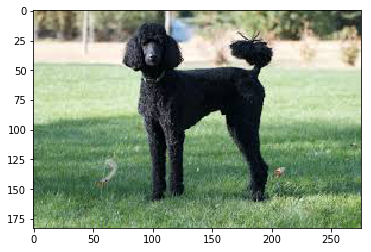

In [343]:
plt.imshow(Image.open('poodle_dog.jpg'))

In [282]:
predict_breed_transfer('poodle_dog.jpg')

'Poodle'

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [350]:
pred_breed=predict_breed_transfer(human_files_short[0])
pred_dir='/data/dog_images/train/{}'.format(data_transfer['train'].classes[pred_breed[0]])
print(pred_dir)
os.path.join(pred_dir,os.listdir(pred_dir)[0])

/data/dog_images/train/015.Basset_hound


'/data/dog_images/train/015.Basset_hound/Basset_hound_01114.jpg'

In [353]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    if face_detector(img_path):
        print('Hello Human!')
        plt.subplot(1,2,1)
        plt.imshow(Image.open(img_path))
        pred_breed=predict_breed_transfer(img_path)
        pred_dir='/data/dog_images/train/{}'.format(data_transfer['train'].classes[pred_breed[0]])
        pred_img=os.path.join(pred_dir,os.listdir(pred_dir)[0])
        plt.subplot(1,2,2)
        plt.imshow(Image.open(pred_img))
        plt.show()
        print('You might be surprised to know that you look like a {}'.format(pred_breed[1]))
        print('\n-----------------------------------\n')
    elif dog_detector(img_path):
        plt.imshow(Image.open(img_path))
        plt.show()
        print('This dog seems to be a {}'.format(predict_breed_transfer(img_path)[1]))
        print('\n-----------------------------------\n')
    else:
        plt.imshow(Image.open(img_path))
        plt.show()
        print('There is no dog or a human in the image!')
        print('\n-----------------------------------\n')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ My model performed quite well as I was expecting after seeing the test accuracy. However, at one point it detected a cat's image as a human face.   

- There is a room for improvement in the human face detection part, since it is prone to false positives (detected 17% of dog images as humans and a cat image as human during testing. We should try data augmentation on human dataset too.
- Applying a pretrained deep learning architecture on face detection could make our model more robust and overcome the false positive situation.
- A more thorough hyperparameter tuning (possibly with AWS Sagemaker's hyperparameter tuners) could further improve our model's performance on confusing images. 

Hello Human!


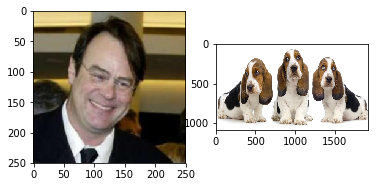

You might be surprised to know that you look like a Basset hound

-----------------------------------

Hello Human!


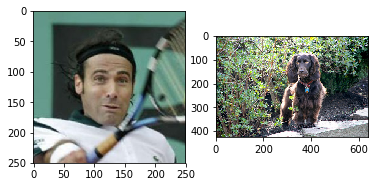

You might be surprised to know that you look like a Boykin spaniel

-----------------------------------

Hello Human!


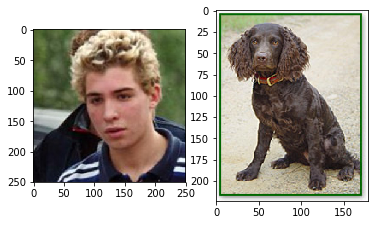

You might be surprised to know that you look like a American water spaniel

-----------------------------------



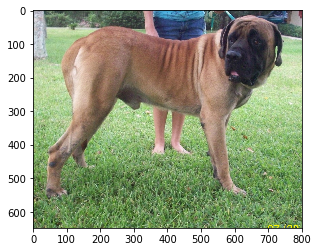

This dog seems to be a Mastiff

-----------------------------------



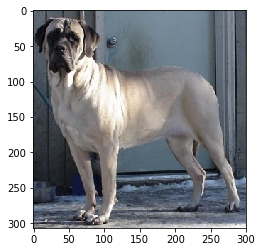

This dog seems to be a Mastiff

-----------------------------------



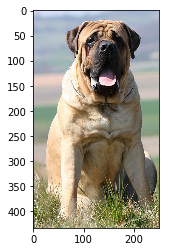

This dog seems to be a Mastiff

-----------------------------------



In [354]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

Hello Human!


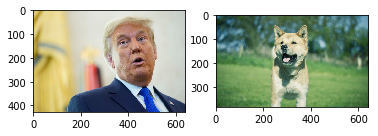

You might be surprised to know that you look like a Akita

-----------------------------------



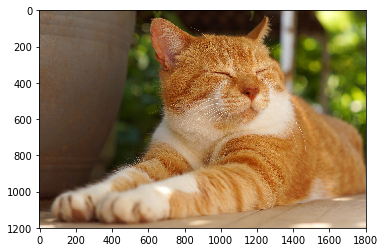

There is no dog or a human in the image!

-----------------------------------



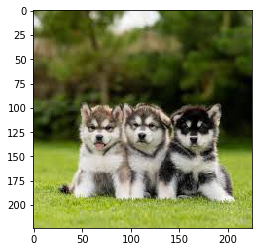

This dog seems to be a Alaskan malamute

-----------------------------------



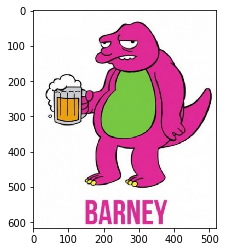

There is no dog or a human in the image!

-----------------------------------

Hello Human!


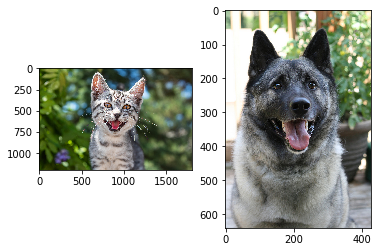

You might be surprised to know that you look like a Norwegian elkhound

-----------------------------------



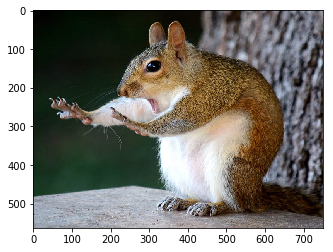

There is no dog or a human in the image!

-----------------------------------



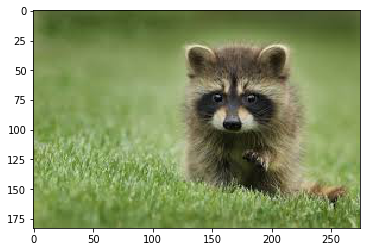

There is no dog or a human in the image!

-----------------------------------



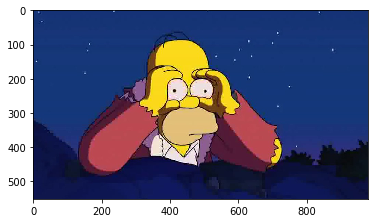

There is no dog or a human in the image!

-----------------------------------



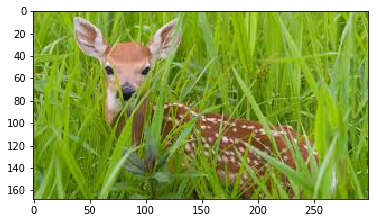

There is no dog or a human in the image!

-----------------------------------



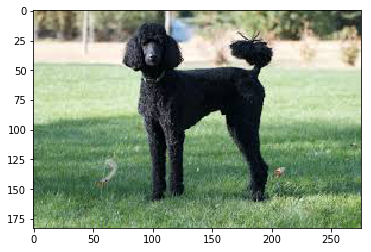

This dog seems to be a Poodle

-----------------------------------



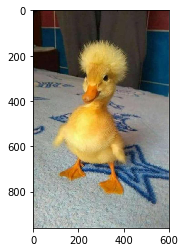

There is no dog or a human in the image!

-----------------------------------

Hello Human!


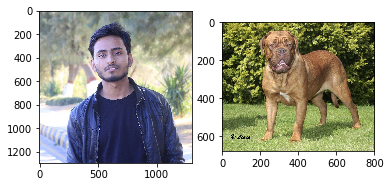

You might be surprised to know that you look like a Dogue de bordeaux

-----------------------------------



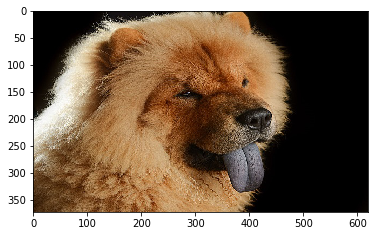

This dog seems to be a Chow chow

-----------------------------------

Hello Human!


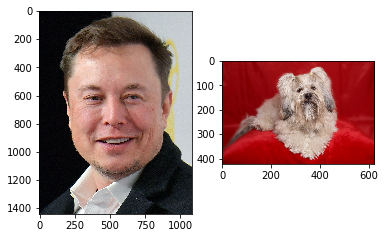

You might be surprised to know that you look like a Lhasa apso

-----------------------------------



In [360]:
for file in np.array(glob('test_images/*')):
    run_app(file)